# COVID 19 EXPLORATORY DATA  ANALYSIS 

IN THIS NOTEBOOK I WILL DO SOME EXPLORATORY DATA ANALYSIS TO ANSWER SOME SEVERAL QUESTIONS ABOUT COVID 19.
THE DATA USED COME FROM VARIETE SOURCE LIKE GITHUB, KAGGLE. 

BY USING COVID-19 DATASET, I WILL ATTEMPT TO ANSWER TO THOSE FOLLOWING QUESTIONS. 
THE QUESTIONS
    1. WHICH COUNTRY HAVE THE GREATESS NUMBER OF RECOVERY IN ONE DAY? 
    2. HOW IS DISTRIBUED THE DATA BETWEEN CONFIRMED CASES, DEATH CASES AND RECOVERY CASES?
    3. WHAT IS THE MOST COVID-19 SYMPTOM AND HOW THERE ARE DISTRIBUED.

In [55]:
# LET'S START BY IMPORT COMMON PYTHON LIBRARIES FOR DATA ANALYSIS
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas.plotting import background_radient
import seaborn as sns 
# A LIBRARY FOR INTERACTIVE VISUALISATION 
import altair as alt 
sns.set()
%matplotlib inline

ImportError: cannot import name 'background_radient' from 'pandas.plotting' (C:\Users\Sensor Network\Anaconda3\lib\site-packages\pandas\plotting\__init__.py)

In [7]:
# DATA SOURCES 
base_url ='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_case_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_case_url = base_url + 'time_series_covid19_deaths_global.csv'
recovered_case_url = base_url + 'time_series_covid19_recovered_global.csv'

symptoms = {'symptom':['Fever','Dry cough','fatigue','Sputum production','Shortness of breath','Muscle pain','Sore throat','headache','Chills'
                      ,'Nausea or vomiting','Nasal congestion','Diarrhoea','Heamoptysis','Conjunctival congestation'], 'percentage':[87.9,67.7
                        ,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]} 
symptoms_spread = pd.DataFrame(data = symptoms, index = np.arange(14)) 
confirmed = pd.read_csv(confirmed_case_url) 
death_case = pd.read_csv(death_case_url) 
recovered_case = pd.read_csv(recovered_case_url)

LET'S START THE ANALYSIS BY LOOKING PATIENTS SYMPTOMS AND HOW THEY ARE DISTRIBUED BY DOING SOME PLOT

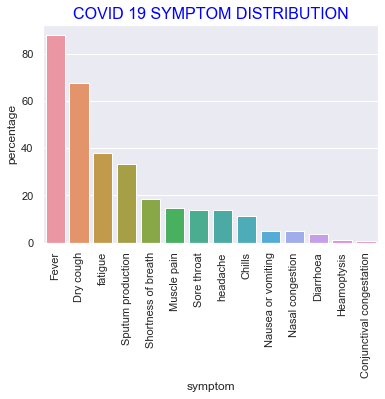

In [8]:
#LOOKING AT THE DISTRIBUTION OF COVID 19 SYMPTOM 

sns.barplot('symptom', 'percentage', data = symptoms_spread) 
plt.xticks(rotation = 90 ) 
plt.title('COVID 19 SYMPTOM DISTRIBUTION', color = 'blue', fontsize = 16) 
plt.show() 


ValueError: could not convert string to float: 'Fever'

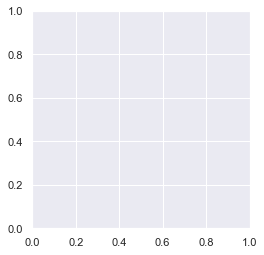

In [9]:
#FOR MORE OBSERVATIONS LET'S DOING A PIE CHART 

explode = (0.3,0.2,0.1,0.1,0.1,0.3,0.2,0.1,0.1,0.1,0.3,0.2,0.1,0.1)
plt.pie(symptoms.values(),autopct = '%1.1%%' )
plt.show()

# COVID 19 TIME SERIE ANALYSIS 
 
LET'S SEEING THE EVOLUTION THOUGHT TIME OF COVID 19 CONFIRMED CASES, DEATH CASES AND RECOVERED CASES  

THERE ARE SOME ANALYSIS TECHNIQUES THAT WE WILL USE THERE LIKE CLEANING DATA MELT DATA AND MORE.

In [10]:
# looking the shape of the confirmed_cases

confirmed.shape

(264, 102)

In [11]:
#let's look the first 10 data lines 
confirmed.head(n=10)  


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,103,104,104,104,104,105,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016


In [12]:
#HAVING MORE INFORMATIONS ON DATA BY USING infos() METHOD
confirmed.info()

#WE CAN SEE THAT DATETIME COLUMN ARE REPRESENTED AS INT WE WILL TURN THIS IN DATETIME. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 102 entries, Province/State to 4/28/20
dtypes: float64(2), int64(98), object(2)
memory usage: 210.5+ KB


In [13]:
#summary statistic on confirmed case
confirmed.describe()
#     as we can the transmission of the virus has raised since the begining of the pandemic. In the first day the median case were null. then the virus become more on date when the median transmission started to become not null. THE MEAN CASE OF THE VIRUS IN THE FIRST DAYS WERE BETWEEN 27.38 TO 89.64 AND START TO INCREASE MORE CONSEQUENTLY ON 28... THEN WE CAN SAY THAT 


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,2.640000e+02
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,9094.102273,9362.723485,9654.625000,9939.799242,10256.598485,10650.011364,10975.848485,11258.950758,11521.833333,1.180454e+04
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,52077.856212,53660.506404,55395.197812,57150.737463,58974.532580,61245.507883,63283.272344,65000.703417,66444.778601,6.800718e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,59.250000,64.000000,64.500000,71.500000,73.000000,73.000000,74.750000,75.750000,7.575000e+01
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,341.500000,343.500000,352.500000,357.000000,380.500000,416.000000,416.500000,432.500000,433.500000,4.435000e+02
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1654.250000,1678.500000,1737.500000,1787.500000,1797.750000,1816.250000,1915.750000,1960.500000,2008.250000,2.048500e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,758809.000000,784326.000000,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06


In [14]:
#writing a method for cleaning data 

def clean_data(data) : 
    group = data.groupby('Country/Region').sum().drop(['Lat','Long'], axis = 1) 
    data_T = group.T 
    date_index = pd.DatetimeIndex(data_T.index) 
    data_T.set_index(date_index, inplace=True)
    return data_T 

In [15]:
confirmed_clean = clean_data(confirmed) 

confirmed_clean.head() 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [16]:
#looking if indexes are date time index
confirmed_clean.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [23]:
#let's write a fonction to plot the time serie data 
def plotting_time_serie(data, x_label,y_label,plot_title,logy = True) : 
  
    ax = data.plot(marker = '.', figsize = (10,5), logy=logy)
    ax.legend(ncol=3, loc = 'upper left')
    plt.xlabel(x_label)
    plt.ylabel(y_label)  
    plt.title(plot_title, fontsize = 15)
 

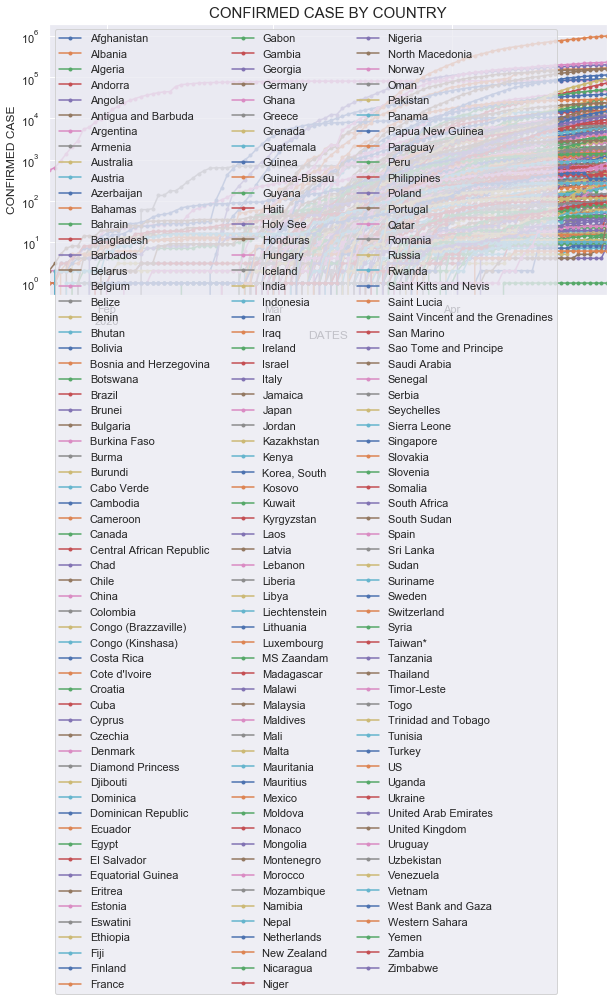

In [24]:
# plotting confirmed case 
plotting_time_serie(confirmed_clean,'DATES','CONFIRMED CASE','CONFIRMED CASE BY COUNTRY', True)

the plot do not show the confirmed case by countries very well. Let's plot the US, ITALY,FRANCE,CHINA AND SPAIN CONFIRMED CASES

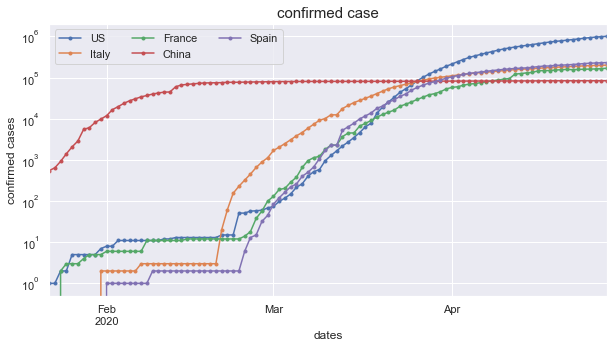

In [25]:
#plotting the most affected country
most_touch = ['US','Italy','France','China','Spain'] 
plotting_time_serie(confirmed_clean[most_touch],'dates','confirmed cases','confirmed case',True)

with the plot, we can see that UNITED STATE become the most affected country in the world at march 28

# CLEANING AND PLOTING DEATH CASES

In [26]:
# CLEANIND DEATH CASES DATASET 
death_case.shape 

(264, 102)

In [27]:
# look at the head of death case dataset
death_case.head(n=10) 


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,33,36,36,40,42,43,47,50,57,58
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,27,27,27,27,28,28,30
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,375,384,392,402,407,415,419,425,432,437
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,36,37,37,37,37,40,40,40,40,41
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,132,136,147,152,165,176,185,192,197,207
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,20,22,24,24,24,27,28,28,29,30
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,26,26,26,26,31,33,33,34,34,39


In [28]:
#I use the method clean_data for cleaning death case dataset

In [29]:
death_clean = clean_data(death_case) 
death_clean.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


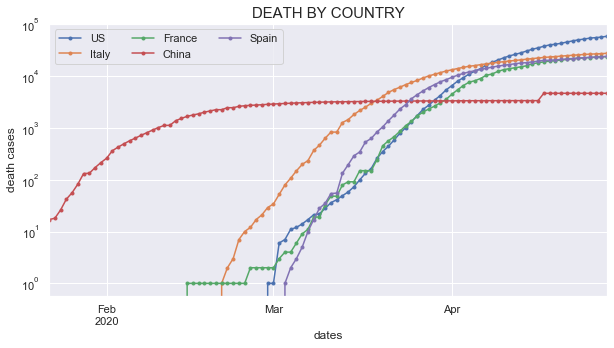

In [30]:
#ploting death case for certain country
most_touch = ['US','Italy','France','China','Spain'] 
plotting_time_serie(death_clean[most_touch],'dates','death cases','DEATH BY COUNTRY',True)

# CLEANING RECOVERED DATASET

In [31]:
recovered_case.shape  

(250, 102)

In [32]:
#all the three dataset have same structure
recovered_case.head(n=10) 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,131,135,150,166,179,188,188,207,220,228
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,314,327,345,356,385,394,403,410,422,431
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,235,248,282,309,333,344,344,344,385,398
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,7,10,10,11,11,11,11,11
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,709,737,840,872,919,976,1030,1107,1140,1162
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,545,580,609,633,659,728,803,833,848,866
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,88,91,92,93,93,97,98,99,100,101
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,1379,1379,1755,1926,2006,2056,2193,2208,2227,2266


In [33]:
recovered_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 102 entries, Province/State to 4/28/20
dtypes: float64(2), int64(98), object(2)
memory usage: 199.3+ KB


In [34]:
#clean recovered data 
recovered_clean = clean_data(recovered_case) 
recovered_clean.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


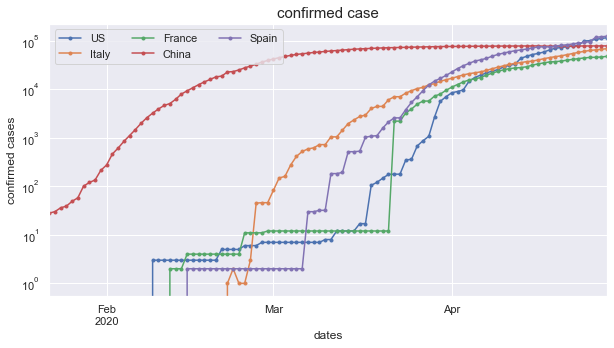

In [35]:
#evolution of recovered case 

most_touch = ['US','Italy','France','China','Spain'] 
plotting_time_serie(recovered_clean[most_touch],'dates','confirmed cases','confirmed case',True)

with this plot we can see that france has the big number of recovered in one day

In [36]:
recovered_clean.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-04-24,188,394,1408,344,6,11,976,728,5136,11872,...,724,369,621,132,220,92,5,1,37,2
2020-04-25,188,403,1479,344,6,11,1030,803,5376,12103,...,774,370,707,132,225,92,5,1,37,2
2020-04-26,207,410,1508,344,6,11,1107,833,5541,12282,...,778,375,789,137,225,83,5,1,42,2
2020-04-27,220,422,1558,385,6,11,1140,848,5588,12362,...,807,386,892,142,225,83,5,1,42,5
2020-04-28,228,431,1651,398,6,11,1162,866,5665,12580,...,813,394,992,142,222,71,5,1,42,5


NOW I WAN TO SEE THE 20 MOST AFFECTED COUNTRIES IN WORLD BY COFIRMED, DEATH, RECOVERED, ACTIVE

In [37]:
# method to retranspose the data 
def transpose(data) : 
    return data.T

In [38]:
confirmed_clean_T = transpose(confirmed_clean)

In [39]:
df = pd.DataFrame(index = confirmed_clean_T.index)
df

""
Country/Region
Afghanistan
Albania
Algeria
Andorra
Angola
...
West Bank and Gaza
Western Sahara
Yemen


In [40]:
df['confirmed'] = confirmed_clean_T.iloc[:,-1]

In [41]:
df.head()

,confirmed
Country/Region,
Afghanistan,1828
Albania,750
Algeria,3649
Andorra,743
Angola,27


In [42]:
#transpose death_cases

In [43]:
death_case_T=transpose(death_clean) 

In [44]:
df['death']=death_case_T.iloc[:,-1]

In [45]:
df.head()

,confirmed,death
Country/Region,,
Afghanistan,1828,58
Albania,750,30
Algeria,3649,437
Andorra,743,41
Angola,27,2


In [46]:
#transpose recovered 

recovered_clean_T=transpose(recovered_clean)

In [47]:
df['recovered']=recovered_clean_T.iloc[:,-1]

In [48]:
df.head()

,confirmed,death,recovered
Country/Region,,,
Afghanistan,1828,58,228
Albania,750,30,431
Algeria,3649,437,1651
Andorra,743,41,398
Angola,27,2,6


In [49]:
df['active'] = df['confirmed'] - (df['death'] + df['recovered'])

In [50]:
df.head()

,confirmed,death,recovered,active
Country/Region,,,,
Afghanistan,1828,58,228,1542
Albania,750,30,431,289
Algeria,3649,437,1651,1561
Andorra,743,41,398,304
Angola,27,2,6,19


In [51]:
df

,confirmed,death,recovered,active
Country/Region,,,,
Afghanistan,1828,58,228,1542
Albania,750,30,431,289
Algeria,3649,437,1651,1561
Andorra,743,41,398,304
Angola,27,2,6,19
...,...,...,...,...
West Bank and Gaza,343,2,71,270
Western Sahara,6,0,5,1
Yemen,1,0,1,0


In [82]:

world = df.sort_values(by=['confirmed','death','recovered','active'], ascending=False).reset_index() 
index = np.arange(1,186)
world.set_index(index, inplace=True) 
world.style.background_gradient(cmap='Reds') 


,Country/Region,confirmed,death,recovered,active
1,US,1012582,58355,115936,838291
2,Spain,232128,23822,123903,84403
3,Italy,201505,27359,68941,105205
4,France,169053,23694,47775,97584
5,United Kingdom,162350,21745,813,139792
6,Germany,159912,6314,117400,36198
7,Turkey,114653,2992,38809,72852
8,Russia,93558,867,8456,84235
9,Iran,92584,5877,72439,14268
10,China,83940,4637,78422,881


In [83]:
#plotting the 20 most affected countries 
world.head(n=20)

,Country/Region,confirmed,death,recovered,active
1,US,1012582,58355,115936,838291
2,Spain,232128,23822,123903,84403
3,Italy,201505,27359,68941,105205
4,France,169053,23694,47775,97584
5,United Kingdom,162350,21745,813,139792
6,Germany,159912,6314,117400,36198
7,Turkey,114653,2992,38809,72852
8,Russia,93558,867,8456,84235
9,Iran,92584,5877,72439,14268
10,China,83940,4637,78422,881


# PLOTTING THE EVOLUTION IS A GRAPH

In [84]:
recovered_clean.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
recovered_clean['recovered per day'] = recovered_clean.sum(axis='columns') 
recovered_clean.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,recovered by day,recovered per day
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,28.0,56.0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30.0,60.0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36.0,72.0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39.0,78.0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52.0,104.0


In [106]:
sumary = pd.DataFrame(index=recovered_clean.index)

In [107]:
sumary['recovered per day'] = recovered_clean['recovered per day']

In [108]:
sumary

,recovered per day
2020-01-22,56.0
2020-01-23,60.0
2020-01-24,72.0
2020-01-25,78.0
2020-01-26,104.0
...,...
2020-04-24,1580162.0
2020-04-25,1635676.0
2020-04-26,1731466.0
2020-04-27,1787934.0


In [109]:
death_clean['death per day'] = death_clean.sum(axis='columns')
sumary['death per day'] = death_clean['death per day']

In [110]:
sumary

,recovered per day,death per day
2020-01-22,56.0,34
2020-01-23,60.0,36
2020-01-24,72.0,52
2020-01-25,78.0,84
2020-01-26,104.0,112
...,...,...
2020-04-24,1580162.0,393436
2020-04-25,1635676.0,405736
2020-04-26,1731466.0,413136
2020-04-27,1787934.0,422334


In [111]:
confirmed_clean['confirmed per day'] = confirmed_clean.sum(axis='columns') 
sumary['confirmed per day'] = confirmed_clean['confirmed per day']

In [114]:
sumary.tail()

,recovered per day,death per day,confirmed per day,active per day
2020-04-24,1580162.0,393436,5623206,3649608.0
2020-04-25,1635676.0,405736,5795248,3753836.0
2020-04-26,1731466.0,413136,5944726,3800124.0
2020-04-27,1787934.0,422334,6083528,3873260.0
2020-04-28,1857316.0,434306,6232796,3941174.0


In [113]:
sumary['active per day'] = sumary['confirmed per day'] - sumary['recovered per day'] - sumary['death per day']

Text(0, 0.5, 'COVID 19 PROGRESSION BY DAY')

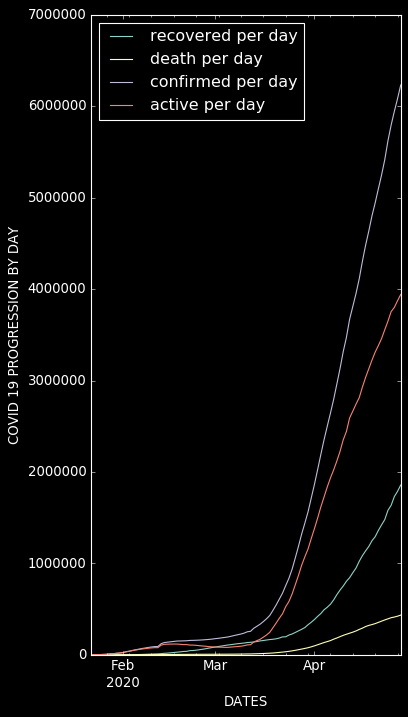

In [127]:
 
    plt.style.use('dark_background')
    sumary.plot(figsize=(5,10)) 
    plt.xlabel('DATES')
    plt.ylabel('COVID 19 PROGRESSION BY DAY')

At start of march the number of recovered was greater than thee number of active case 

In [126]:
for style in plt.style.available :
    print(style)

bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark-palette
seaborn-dark
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
seaborn
Solarize_Light2
tableau-colorblind10
_classic_test
